In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
import pandas as pd

df=pd.read_csv("D:\Thesis\messy work\Final.csv")
df['TURBIDITY']=pd.to_numeric(df['TURBIDITY'],errors='coerce')
df['Labels']=df.Labels.astype(float)
df=df[['TEMPL','PHL','EC','CHLORIDE','TALKAL','TURBIDITY','DO','BOD','Labels']]

XRaw=np.array(df)
XRaw=np.random.permutation(XRaw)

def norm(X):
    meanAr=np.mean(X,axis=1)
    meanAr=np.reshape(meanAr,(meanAr.shape[0],1))
    varAr=np.var(X,axis=1)
    varAr=np.reshape(varAr,(varAr.shape[0],1))
    normX=np.divide(np.subtract(X,meanAr),varAr)
    return normX,meanAr,varAr

def normRet(X,XTrainMean,XTrainVar):
    normX=np.divide(np.subtract(X,XTrainMean),XTrainVar)
    return normX

Val=XRaw[0:400,:]
Test=XRaw[400:800,:]
Train=XRaw[800:-1,:]

def oneHot(labels,C):
    C=tf.constant(C)
    oneHotMat=tf.one_hot(labels,C,axis=0)
    sess=tf.Session()
    oneHot=sess.run(oneHotMat)
    sess.close()
    return oneHot

XTrainR=np.transpose(Train[:,0:-1])
XTrain,Xmean,Xvar=norm(XTrainR)
YTrain=Train[:,-1]
YTrain=np.transpose(YTrain)    #No need to reshape as one_hot handles the the missing dimension automatically
YTrain=oneHot(YTrain,10)

XTestR=np.transpose(Test[:,0:-1])
XTest=normRet(XTestR,Xmean,Xvar)
YTest=Test[:,-1]
YTest=np.transpose(YTest)
YTest=oneHot(YTest,10)

XValR=np.transpose(Val[:,0:-1])
XVal=normRet(XValR,Xmean,Xvar)
YVal=Val[:,-1]
YVal=np.transpose(YVal)
YVal=oneHot(YVal,10)




In [2]:
print(XTrainR,XTrainR.shape)
print(YTrain,YTrain.shape)
print(XTrain,XTrain.shape)

[[  29.5    25.     29.5  ...,   28.     29.     26.6 ]
 [   7.15    7.73    6.78 ...,    6.95    6.9     7.1 ]
 [ 220.    340.    104.   ...,  232.    130.    150.  ]
 ..., 
 [   6.     25.      6.5  ...,    6.     50.      9.5 ]
 [   6.      8.6     6.6  ...,    4.8     7.1     7.3 ]
 [   3.      4.      3.2  ...,    8.      1.3     3.6 ]] (8, 3194)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (10, 3194)
[[  2.53851394e-01  -3.74494940e-01   2.53851394e-01 ...,   4.44026163e-02
    1.84035135e-01  -1.51082910e-01]
 [ -3.51456538e-01   1.93383748e+00  -1.80931651e+00 ...,  -1.13948896e+00
   -1.33649706e+00  -5.48464643e-01]
 [ -3.14970479e-04  -1.89602585e-04  -4.36159443e-04 ...,  -3.02433690e-04
   -4.08996400e-04  -3.88101751e-04]
 ..., 
 [ -9.11027818e-03   1.12205076e-03  -8.84100637e-03 ...,  -9.11027818e-03
    1.45856415e-0

In [3]:
def createPlace(nX,nY):
    X=tf.placeholder(tf.float32,shape=(nX,None))
    Y=tf.placeholder(tf.float32,shape=(nY,None))
    return X,Y

def initParameters():
    W1 = tf.get_variable("W1",[30,8],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    W2 = tf.get_variable("W2",[30,30],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b2 = tf.get_variable("b2", [30,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    W3 = tf.get_variable("W3",[30,30],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b3 = tf.get_variable("b3", [30,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    W4 = tf.get_variable("W4",[30,30],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b4 = tf.get_variable("b4", [30,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    W5 = tf.get_variable("W5",[20,30],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b5 = tf.get_variable("b5", [20,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    W6 = tf.get_variable("W6",[10,20],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b6 = tf.get_variable("b6", [10,1], initializer = tf.zeros_initializer(),dtype=tf.float32)
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5,
                  "W6": W6,
                  "b6": b6}

    return parameters

def forward(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']

    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)
    A5 = tf.nn.relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5),b6)

    return Z6

def compCost(Z6,Y):
    logits=tf.transpose(Z6)
    labels=tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost



In [4]:
def model(XTrainR,YTrain,XValR,YVal,learning_rate=.001,num_epochs=1000,print_cost=True):
    ops.reset_default_graph()
    (nX,m)=XTrainR.shape
    nY=YTrain.shape[0]
    costs=[]
    
    X,Y=createPlace(nX,nY)
    parameters=initParameters()
    Z6=forward(X,parameters)
    cost=compCost(Z6,Y)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        #print(XTrainR)
        #print(YTrain)
        #print(XTrainR.shape)
        #print(YTrain.shape)
        for epoch in range(num_epochs):
            epoch_cost=0
            _,epoch_cost=sess.run([optimizer,cost],feed_dict={X:XTrainR,Y:YTrain})
            #print(epoch_cost)
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch,epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction=tf.equal(tf.argmax(Z6),tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:",accuracy.eval({X:XTrainR,Y:YTrain}))
        print ("Test Accuracy:", accuracy.eval({X:XValR,Y:YVal}))

        return parameters



Cost after epoch 0: 39.040138
Cost after epoch 100: 1.749312
Cost after epoch 200: 1.581507
Cost after epoch 300: 1.512446
Cost after epoch 400: 1.457039
Cost after epoch 500: 1.406878
Cost after epoch 600: 1.343410
Cost after epoch 700: 1.280093
Cost after epoch 800: 1.233705
Cost after epoch 900: 1.192825
Cost after epoch 1000: 1.153489
Cost after epoch 1100: 1.116660
Cost after epoch 1200: 1.088524
Cost after epoch 1300: 1.060677
Cost after epoch 1400: 1.036101
Cost after epoch 1500: 1.016995
Cost after epoch 1600: 1.003487
Cost after epoch 1700: 0.980159
Cost after epoch 1800: 0.961416
Cost after epoch 1900: 0.944569
Cost after epoch 2000: 1.080964
Cost after epoch 2100: 0.918041
Cost after epoch 2200: 0.906669
Cost after epoch 2300: 0.899310
Cost after epoch 2400: 0.885709
Cost after epoch 2500: 0.880949
Cost after epoch 2600: 0.871409
Cost after epoch 2700: 0.858534
Cost after epoch 2800: 0.846947
Cost after epoch 2900: 0.840033
Cost after epoch 3000: 0.840706
Cost after epoch 31

Cost after epoch 25200: 0.414363
Cost after epoch 25300: 0.412749
Cost after epoch 25400: 0.412342
Cost after epoch 25500: 0.410126
Cost after epoch 25600: 0.414397
Cost after epoch 25700: 0.410379
Cost after epoch 25800: 0.411556
Cost after epoch 25900: 0.406534
Cost after epoch 26000: 0.412524
Cost after epoch 26100: 0.418008
Cost after epoch 26200: 0.533857
Cost after epoch 26300: 0.399957
Cost after epoch 26400: 0.398782
Cost after epoch 26500: 0.398514
Cost after epoch 26600: 0.409990
Cost after epoch 26700: 0.395948
Cost after epoch 26800: 0.397287
Cost after epoch 26900: 0.426655
Cost after epoch 27000: 0.394324
Cost after epoch 27100: 0.393788
Cost after epoch 27200: 0.392669
Cost after epoch 27300: 0.392125
Cost after epoch 27400: 0.403731
Cost after epoch 27500: 0.397949
Cost after epoch 27600: 0.392463
Cost after epoch 27700: 0.406468
Cost after epoch 27800: 0.389549
Cost after epoch 27900: 0.456446
Cost after epoch 28000: 0.387800
Cost after epoch 28100: 0.389518
Cost after

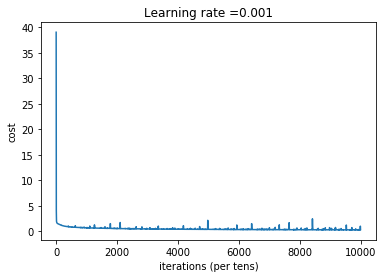

Parameters have been trained!
Train Accuracy: 0.884784
Test Accuracy: 0.7075


In [5]:
parameters=model(XTrainR,YTrain,XValR,YVal,learning_rate=.001,num_epochs=50000,print_cost=True)